In [ ]:
# 노트북에서 현재 Python 환경에 TensorFlow 설치
import sys
!{sys.executable} -m pip install tensorflow


# 오차
### 평균제곱오차 (Mean Square Error, MSE)
- 점과 실제 값 사이의 거리를 계산
- 오차들의 값의 합이 작으면 좋고, 너무 크면 좋지 않음
  
- 오차를 모두 더하는 것이 오차를 계산하기 좋으나 양수와 음수가 섞여 합이 0이 될 수 있는 문제 발생 -> 부호를 없애야 하므로 제곱을 수행


In [33]:
import numpy as np

x = np.array([2,4,6,8,5])
y = np.array([81,93,91,97,10])

# fake_a와 fake_b 범위에서 모든 조합의 예측값 저장
fake_a = np.arange(1, 4, 0.1)
fake_b = np.arange(1, 100, 0.1)

# 결과를 저장할 리스트들
all_predictions = []  # 모든 예측값 저장
all_mse = []         # 모든 MSE 값 저장
parameter_combinations = []  # (a, b) 조합 저장

# fake_a와 fake_b의 모든 조합에 대해 계산
for a_val in fake_a:
    for b_val in fake_b:
        # 현재 a, b 조합으로 예측값 계산
        predictions = a_val * x + b_val
        
        # MSE 계산
        mse = (1/len(x)) * sum((y - predictions) ** 2)
        
        # 결과 저장
        all_predictions.append(predictions)
        all_mse.append(mse)
        parameter_combinations.append((a_val, b_val))

# 결과를 numpy 배열로 변환
all_predictions = np.array(all_predictions)
all_mse = np.array(all_mse)
parameter_combinations = np.array(parameter_combinations)

# 최소 MSE와 해당 파라미터 찾기
min_mse_idx = np.argmin(all_mse)
best_a, best_b = parameter_combinations[min_mse_idx]
min_mse = all_mse[min_mse_idx]

print(f"\n최적의 파라미터:")
print(f"a = {best_a:.1f}, b = {best_b:.1f}")
print(f"최소 MSE = {min_mse:.2f}")

# 최적 파라미터로 예측한 값들
best_predictions = all_predictions[min_mse_idx]
print(f"\n최적 파라미터로 예측한 값들:")
for i in range(len(x)):
    print(f"공부시간={x[i]}, 실제점수={y[i]}, 예측점수={best_predictions[i]:.1f}")



최적의 파라미터:
a = 2.3, b = 62.9
최소 MSE = 1043.48

최적 파라미터로 예측한 값들:
공부시간=2, 실제점수=81, 예측점수=67.5
공부시간=4, 실제점수=93, 예측점수=72.1
공부시간=6, 실제점수=91, 예측점수=76.7
공부시간=8, 실제점수=97, 예측점수=81.3
공부시간=5, 실제점수=10, 예측점수=74.4


### 경사하강법
- 먼저 선을 긋고 수정해 나가자.
- 오차의 그래프를 그렸을 때 오차값이 최소가 되는 지점을 찾는 방법
- 즉 최적의 기울기를 찾아야 함.

- 기울기에 따른 오차 값의 그래프에서 기울기가 0이 되는 점
- 이 점을 찾기 위해 미분을 수행

다음 과정을 거친다
1. a1에서 미분을 구한다.
2. 구한 기울기의 반대 방향으로 얼마간 이동시킨 a2에서 미분을 구한다.
3. 앞에서 구한 미분 값이 0이 아니면 1과 2의 과정을 반복한다.

epoch=0, Gradient=27.8400, Bias=5.4300
epoch=100, Gradient=7.0739, Bias=50.5117
epoch=200, Gradient=4.0960, Bias=68.2822
epoch=300, Gradient=2.9757, Bias=74.9678
epoch=400, Gradient=2.5542, Bias=77.4830
epoch=500, Gradient=2.3956, Bias=78.4293
epoch=600, Gradient=2.3360, Bias=78.7853
epoch=700, Gradient=2.3135, Bias=78.9192
epoch=800, Gradient=2.3051, Bias=78.9696
epoch=900, Gradient=2.3019, Bias=78.9886
epoch=1000, Gradient=2.3007, Bias=78.9957
epoch=1100, Gradient=2.3003, Bias=78.9984
epoch=1200, Gradient=2.3001, Bias=78.9994
epoch=1300, Gradient=2.3000, Bias=78.9998
epoch=1400, Gradient=2.3000, Bias=78.9999
epoch=1500, Gradient=2.3000, Bias=79.0000
epoch=1600, Gradient=2.3000, Bias=79.0000
epoch=1700, Gradient=2.3000, Bias=79.0000
epoch=1800, Gradient=2.3000, Bias=79.0000
epoch=1900, Gradient=2.3000, Bias=79.0000
epoch=2000, Gradient=2.3000, Bias=79.0000


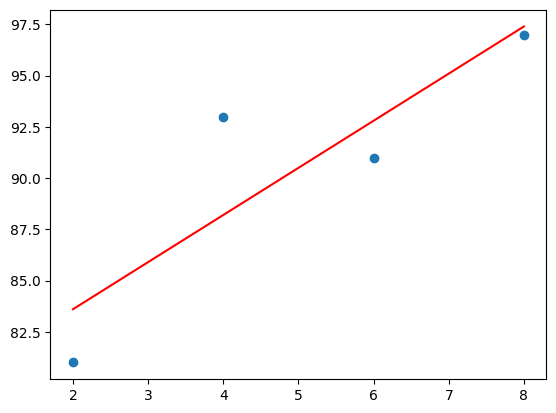

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# 공부 시간 X와 성적 Y의 넘파이 배열을 만듬
x = np.array([2,4,6,8])
y = np.array([81,93,91,97])

# plt.scatter(x, y)
# plt.show()

a = 0
b = 0
lr = 0.03

epochs = 2001
n = len(x)

# 경사 하강법 시작
for i in range(epochs):
    y_pred = a * x + b
    error = y - y_pred
    
    a_diff = (2/n) * sum(-x * (error))
    b_diff = (2/n) * sum(-(error))

    a = a - lr * a_diff
    b = b - lr * b_diff


    if i % 100 == 0:
        print("epoch=%.f, Gradient=%.04f, Bias=%.04f" % (i, a, b))

y_pred = a * x + b

plt.scatter(x, y)
plt.plot(x, y_pred, 'r')
plt.show()


### 다중 선형 회귀
- 독립변수 a_1x_1 + a_2x_2 + b
- 두 기울기 a1, a2를 모두 구해야 함

In [44]:
# 공부 시간 x1과 과외 시간 x2, 성적 y의 넘파이 배열을 만듭니다.
x1 = np.array([2,4,6,8])
x2 = np.array([0,4,2,3])
x3 = np.array([0,1,0,1])
y = np.array([81,93,91,97])

# # 데이터의 분포를 그래프로 나타낸다.
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter3D(x1, x2, y);
# plt.show()

a1 = 0
a2 = 0
a3 = 0
b = 0

lr = 0.01

epochs = 2001

n = len(x1)

for i in range(epochs):
    y_pred = a1 * x1 + a2 * x2 + a3 * x3 + b
    error = y - y_pred

    a1_diff = (2/n) * sum(-x1 * (error))
    a2_diff = (2/n) * sum(-x2 * (error))
    a3_diff = (2/n) * sum(-x3 * (error))
    b_diff = (2/n) * sum(-(error))

    a1 = a1 - lr * a1_diff
    a2 = a2 - lr * a2_diff
    a3 = a3 - lr * a3_diff
    b = b - lr * b_diff

    if i % 100 == 0:
        print("epoch=%.f, grad1=%.04f, grad2=%.04f, grad3=%.04f, bias=%.04f" % (i, a1, a2, a3, b))

print("실제 점수 : ", y)
print("예측 점수 : ", y_pred)

epoch=0, grad1=9.2800, grad2=4.2250, grad3=0.9500, bias=1.8100
epoch=100, grad1=9.5619, grad2=5.2748, grad3=-1.5857, bias=22.9257
epoch=200, grad1=7.3278, grad2=5.0723, grad3=-3.2684, bias=37.7954
epoch=300, grad1=5.7128, grad2=4.8503, grad3=-4.1876, bias=48.5612
epoch=400, grad1=4.5484, grad2=4.6145, grad3=-4.5953, bias=56.3670
epoch=500, grad1=3.7088, grad2=4.3774, grad3=-4.6655, bias=62.0364
epoch=600, grad1=3.1029, grad2=4.1474, grad3=-4.5196, bias=66.1624
epoch=700, grad1=2.6654, grad2=3.9296, grad3=-4.2418, bias=69.1727
epoch=800, grad1=2.3492, grad2=3.7269, grad3=-3.8898, bias=71.3754
epoch=900, grad1=2.1205, grad2=3.5405, grad3=-3.5027, bias=72.9926
epoch=1000, grad1=1.9548, grad2=3.3708, grad3=-3.1063, bias=74.1849
epoch=1100, grad1=1.8346, grad2=3.2173, grad3=-2.7174, bias=75.0680
epoch=1200, grad1=1.7473, grad2=3.0791, grad3=-2.3462, bias=75.7257
epoch=1300, grad1=1.6837, grad2=2.9554, grad3=-1.9988, bias=76.2185
epoch=1400, grad1=1.6372, grad2=2.8450, grad3=-1.6781, bias=76

### Tensorflow에서 실행하는 선형회귀
- y = ax + b -> 가설함수(Hypothesis) H(x) = wx + b
- w = weight, b = bias
- 평균 제곱 오차와 같이 실제값과 예측값의 차이 -> 손실함수 (loss function)
- 경사 하강법과 같은 최적화 기법 -> 옵티마이저 (Optimizer)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 8970.3535
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2147.0659
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1139.5706
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 986.3035
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 958.5356
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 949.2347
Epoch 7/500


/Users/junochoi/Documents/University/1학년_2학기/인공신경망/new_venv/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 942.6796
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 936.5616
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 930.5410
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 924.5681
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 918.6351
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 912.7406
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 906.8843
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 901.0660
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 895.2853
Epoch 16/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 889.5419
Epoch 17/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 883.8359
Epoch 18/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 878.1668
Epoch 19/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 872.5344
Epoch 20/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 866.9386
Epoch 21/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 861.

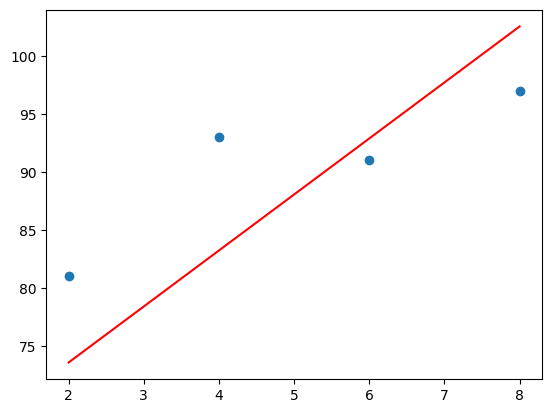

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
예측 점수 : 7을 공부한 경우의 예상 점수는 97.70점 입니다.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

x = np.array([2,4,6,8])
y = np.array([81,93,91,97])

model = Sequential()

# 출력 값, 입력 변수, 분석 방법에 맞게끔 모델을 설정
model.add(Dense(1, input_dim=1, activation="linear"))

# 오차 수정을 위해 SGD를, 오차의 정도를 판단하기 위해 MSE를 사용
model.compile(optimizer="sgd", loss="mse")

# 오차를 최소화 하는 과정을 500번 반복
model.fit(x, y, epochs=500)

plt.scatter(x, y)
plt.plot(x, model.predict(x), 'r')
plt.show()

# 임의의 시간을 집어넣어 점수를 예측하는 모델 테스트
hour = 7
input_data = tf.constant([[hour]])
prediction = model.predict(input_data)

print(f"예측 점수 : {hour}시간을 공부한 경우의 예상 점수는 {prediction[0][0]:.2f}점 입니다.")




In [49]:
# 다중 선형회귀 실습
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

x = np.array([[2,0], [4,4], [6,2], [8,3]])
y = np.array([81,93,91,97])

model = Sequential()

# 출력 값, 입력 변수, 분석 방법에 맞게끔 모델을 설정
model.add(Dense(1, input_dim=2, activation="linear"))

# 오차 수정을 위해 SGD를, 오차의 정도를 판단하기 위해 MSE를 사용
model.compile(optimizer="sgd", loss="mse")

# 오차를 최소화 하는 과정을 500번 반복
model.fit(x, y, epochs=500)
# 임의의 시간을 집어넣어 점수를 예측하는 모델 테스트
hour = 6
private_class = 3
input_data = tf.constant([[hour, private_class]])
prediction = model.predict(input_data)

print(f"예측 점수 : {hour}시간을 공부한 경우의 예상 점수는 {prediction[0][0]:.2f}점 입니다.")




Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 8446.9863
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1454.1755
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 956.8583
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 916.4062
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 908.1235
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 902.1407
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 896.3570
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 890.6240
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 884.9310
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 879.2767
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 873.6611
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 868.0834
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 862.5433
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 857.0405
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - lo